<center><h1>Crimes in Vancouver</h1></center>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

%matplotlib inline
sns.set_style('whitegrid')

In [23]:
vancouver_data = pd.read_csv('dataset/crime.csv')
vancouver_data['counter'] = 1

In [24]:
vancouver_data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,counter
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,1


In [25]:
vancouver_data.columns = vancouver_data.columns.str.lower()

In [26]:
vancouver_data.columns

Index(['type', 'year', 'month', 'day', 'hour', 'minute', 'hundred_block',
       'neighbourhood', 'x', 'y', 'latitude', 'longitude', 'counter'],
      dtype='object')

In [27]:
vancouver_data.isna().sum()

type                 0
year                 0
month                0
day                  0
hour             54362
minute           54362
hundred_block       13
neighbourhood    56624
x                    0
y                    0
latitude             0
longitude            0
counter              0
dtype: int64

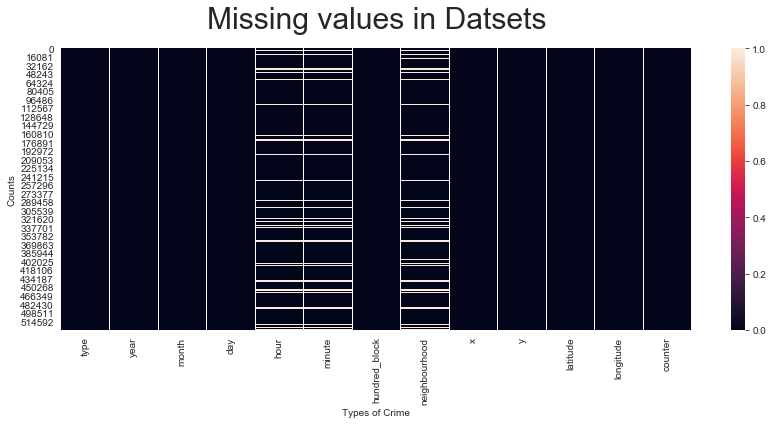

In [28]:
plt.figure(figsize=(12,6))
plt.title('Missing values in Datsets',fontdict={'fontsize':'30'},pad=20)
ax = sns.heatmap(vancouver_data.isna())
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.tight_layout()

# What are the various types of crime

In [29]:
vancouver_data['type'].value_counts()

Theft from Vehicle                                        172700
Mischief                                                   70413
Break and Enter Residential/Other                          60862
Offence Against a Person                                   54142
Other Theft                                                52167
Theft of Vehicle                                           38418
Break and Enter Commercial                                 33845
Theft of Bicycle                                           25730
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Homicide                                                     220
Name: type, dtype: int64

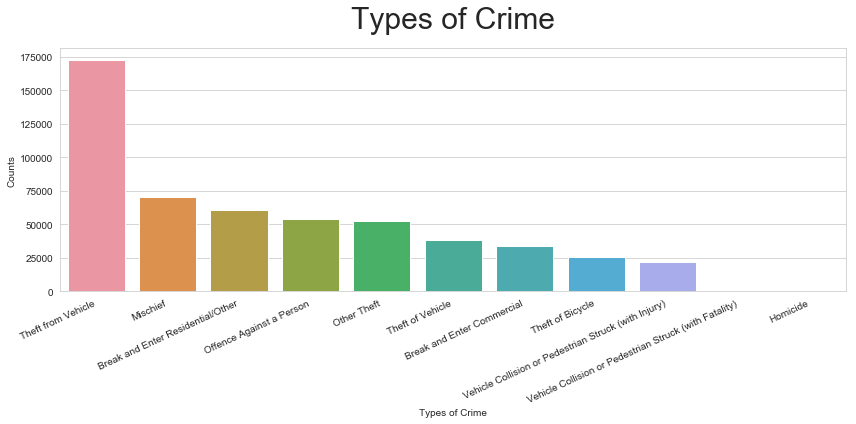

In [33]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='type',data=vancouver_data, order = vancouver_data['type'].value_counts().index)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

<div class="alert alert-info" role="alert">
<h3>Top 3 types of crimes in Vancouver are:</h3>
<ol>
    <li>Theft from Vehicle</li>
    <li>Mischief</li>
    <li>Break and Enter Residentail/Other</li>
</ol>
</div>

# Trends over the years of the crime in Vancouver

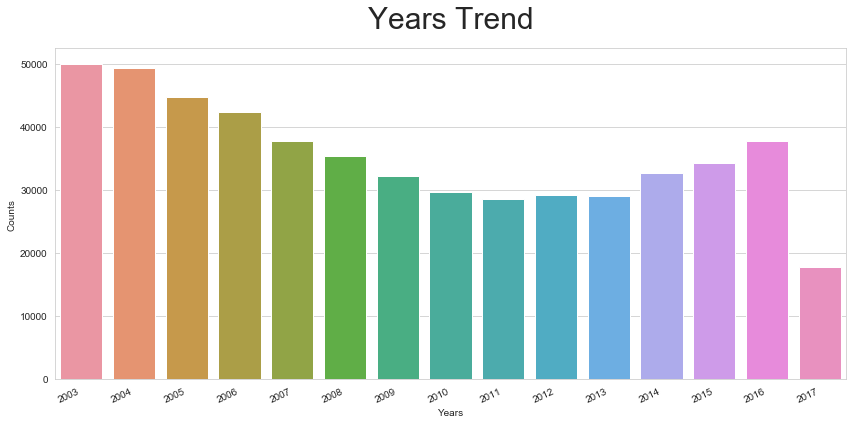

In [34]:
plt.figure(figsize=(12,6))
plt.title('Years Trend',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='year',data=vancouver_data)
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

<div class="alert alert-info" role="alert">
From the year 2003 to 2017 and the trends shows decresase in crime rate over the period.
</div>

# 5 safest area in Vancouver

In [35]:
safe_region = vancouver_data.groupby(['neighbourhood']).count()['counter'].sort_values(ascending=True).head(5)
safe_region

neighbourhood
Musqueam            532
Stanley Park       3775
South Cambie       5212
Shaughnessy        5426
West Point Grey    5871
Name: counter, dtype: int64

# 5 dangerous area in Vancouver

In [36]:
danger_region = vancouver_data.groupby(['neighbourhood']).count()['counter'].sort_values(ascending=False).head(5)
danger_region

neighbourhood
Central Business District    110947
West End                      41352
Fairview                      32161
Mount Pleasant                30536
Grandview-Woodland            27180
Name: counter, dtype: int64

# Major type of crime in dangerous area

In [37]:
danger_region = vancouver_data.groupby(['neighbourhood','type']).count()['counter'].sort_values(ascending=False).head(5)
danger_region

neighbourhood              type              
Central Business District  Theft from Vehicle    48003
                           Other Theft           19244
West End                   Theft from Vehicle    16904
Central Business District  Mischief              16672
Fairview                   Theft from Vehicle    11934
Name: counter, dtype: int64

# Which month has the maximum crime rate over the given peroid of time?

In [41]:
months = vancouver_data.groupby(['month']).count()['counter'].sort_values(ascending=False).head(5)
months

month
5    46883
6    46711
8    45946
7    45679
3    45314
Name: counter, dtype: int64

# Which day has the maximum crime rate?

In [44]:
vancouver_data.groupby(['day']).count()['counter'].sort_values(ascending=False).head(5)

day
1     19512
15    19298
12    18388
7     18186
11    18171
Name: counter, dtype: int64

<div class="alert alert-info" role="alert">
For most of the companies the payrolls are biweekly and the data echos in the same tone as 15th and 1st of month has the highest crime rate.
</div>

# Which hour of the day has the maximum crime rate?

In [43]:
vancouver_data.groupby(['hour']).count()['counter'].sort_values(ascending=False).head(5)

hour
18.0    36195
17.0    31621
19.0    29590
22.0    28791
20.0    27707
Name: counter, dtype: int64

<div class="alert alert-info" role="alert">
Almost every house in Vancouver has car.
In dark the chance of not being caught increases.
</div>